<a href="https://colab.research.google.com/github/sanazgit/OpenCV/blob/main/Morphological_Transformations_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

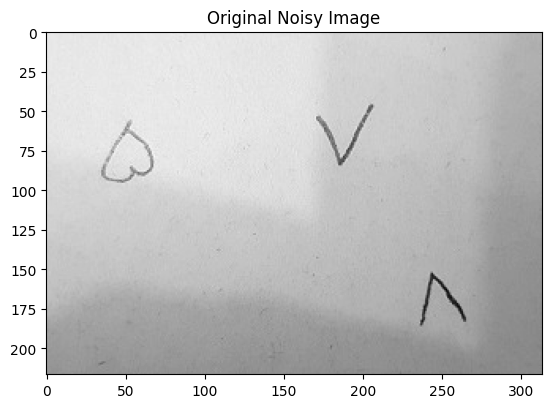

In [ ]:
img= cv2.imread("/content/drive/MyDrive/Colab Notebooks/Image/adad.jpg",0)
plt.imshow(img, cmap='gray');plt.title('Original Noisy Image');

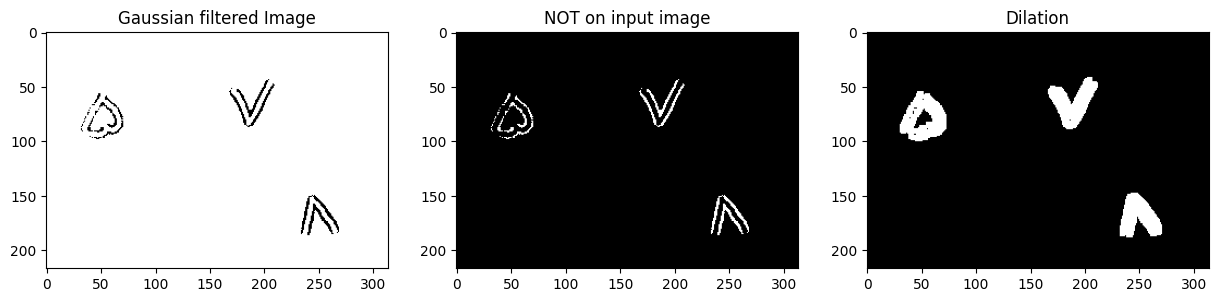

In [ ]:
img = cv2.bitwise_not(img)
noise_removed_image = cv2.GaussianBlur(img,(7,7),0)
binary_image= cv2.adaptiveThreshold(noise_removed_image,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,5,2)

not_img = cv2.bitwise_not(binary_image)
kernel = np.ones((5,5), np.uint8)
dilation = cv2.dilate(not_img, kernel, iterations = 1)

plt.figure(figsize=[15,7])
plt.subplot(131);plt.imshow(binary_image, cmap='gray');plt.title("Gaussian filtered Image");
plt.subplot(132);plt.imshow(not_img, cmap='gray');plt.title('NOT on input image');
plt.subplot(133);plt.imshow(dilation, cmap='gray');plt.title('Dilation');

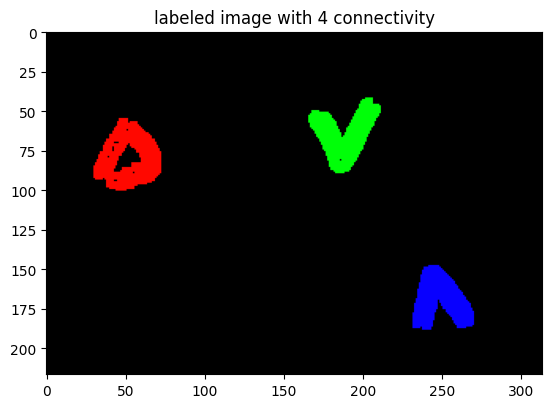

In [ ]:
_, labels_with_4_connectivity = cv2.connectedComponents(dilation, connectivity=4)
label_hue4 = np.uint8(179*labels_with_4_connectivity/np.max(labels_with_4_connectivity))

blank = np.ones_like(img) * 255
labeled_img4 = cv2.merge([label_hue4, blank, blank])

# Converting cvt to BGR
labeled_img4 = cv2.cvtColor(labeled_img4, cv2.COLOR_HSV2BGR)

# set bg label to black
labeled_img4[label_hue4==0] = 0

plt.imshow(labeled_img4, cmap='gray');plt.title("labeled image with 4 connectivity");